# Audio Files Preprocessing

In [2]:
#imports
import numpy as np
from python_speech_features import mfcc, delta, logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import join as pjoin
import IPython.display as ipd

np.random.seed(1234)

## Data preprocessing

AUDIO length = 1.0s


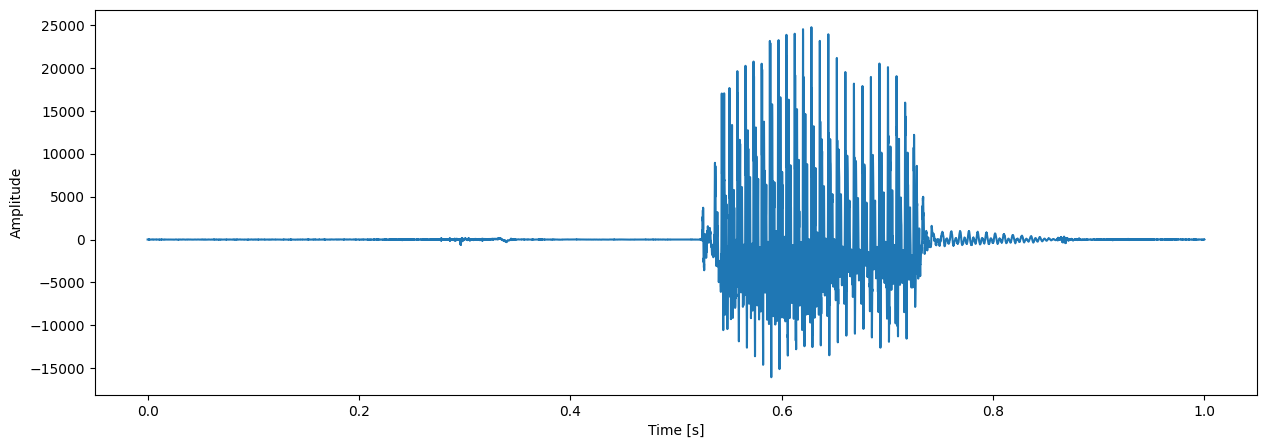

In [3]:
# Test with one file
samplerate, signl = wav.read("speechdataset/bed/00176480_nohash_0.wav")
signal_length = signl.shape[0]/samplerate

print(f"AUDIO length = {signal_length}s")

# Plot the audio signal
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(np.linspace(0., signal_length, len(signl)), signl)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [5]:
ipd.Audio("speechdataset/marvin/01d22d03_nohash_0.wav")

In [3]:
# MFCCs of the signal
mfcc_feat_E = mfcc(signal=signl, samplerate=samplerate, winlen=0.025, winstep=0.005, numcep=13, nfilt=26, nfft=512,
                lowfreq=0, appendEnergy=True)
mfcc_feat = mfcc(signal=signl, samplerate=samplerate, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=512,
                lowfreq=0, appendEnergy=False)
d_mfcc_feat = delta(mfcc_feat_E, 2)
d2_mfcc_feat = delta(d_mfcc_feat, 2)
fbank_feat = logfbank(signl, samplerate)


print('MFCCs shape:', np.shape(mfcc_feat_E))
print('Deltas shape:', np.shape(d_mfcc_feat))
print('Delta-delta shape:', np.shape(d2_mfcc_feat))
print('All features shape:', np.shape(np.concatenate((mfcc_feat_E[:,1:], d_mfcc_feat[:,1:], d2_mfcc_feat[:,1:],
                                                      mfcc_feat_E[:,:1], d_mfcc_feat[:,:1], d2_mfcc_feat[:,:1]), axis=1)))

MFCCs shape: (196, 13)
Deltas shape: (196, 13)
Delta-delta shape: (196, 13)
All features shape: (196, 39)


In [4]:
# Data loading
# Folder directories
data_dir = 'speechdataset/'
keywords = ['bed', 'down', 'forward', 'house', 'nine', 'one', 'six', 'tree', 'visual', 'bird', 'eight', 'four', 'learn', 'no',
            'right', 'stop', 'two', 'wow', 'cat', 'five', 'go', 'left', 'off', 'seven', 'up', 'yes', 'backward', 'dog', 
            'follow', 'happy', 'marvin', 'on', 'sheila', 'three', 'zero']

There are 39 features for each frame and they are ordered in the following way:
   - 12 MFCCs
   - 12 delta-coefs
   - 12 delta-delta-coefs
   - Log(Energy)
   - Log(delta-Energy)
   - Log(delta-delta-Energy)
    
The data is stored in a tensor where all the preprocessed audio files are stacked. Each audio file is represented as a matrix of 99 (frames) x 39 (features).

In [7]:
'''# Parameters
window_lengths = np.array([0.02, 0.025, 0.03]) #s
window_steps = [0.005, 0.01, 0.02] #s
frames = [197, 99, 66]
num_coefs = 13 # keep cepstral coefs 1 to 'num_coefs'; when appendEnergy=True the 1st coef is the log-energy
num_filters_s = [20, 26, 30, 40]
'''

window_lengths = np.array([0.025]) #s
window_steps = [0.02] #s
frames = [50]
num_coefs = 13 # keep cepstral coefs 1 to 'num_coefs'; when appendEnergy=True the 1st coef is the log-energy
num_filters_s = [26]


# Go through all the available files and find their audio features
for keyword in keywords:
    folder_path = Path(pjoin(data_dir, keyword))
    print('STARTED', keyword, 'PREPROCESSING')
    for window_len in window_lengths:
        for window_step, frame in zip(window_steps, frames):
            for num_filt in num_filters_s:
                audio_features = np.zeros((frame,39))
                for wav_file in folder_path.glob('*.wav'):
                    samplerate, signl = wav.read(wav_file)
                    # MFCCs
                    mfcc_feat = mfcc(signal=signl, samplerate=samplerate, winlen=window_len, winstep=window_step,
                                     numcep=num_coefs, nfilt=num_filt, nfft=512, lowfreq=0, appendEnergy=True)
                    # Delta coefs
                    d_mfcc_feat = delta(mfcc_feat, 2)
                    # Delta-Delta coefs
                    d2_mfcc_feat = delta(d_mfcc_feat, 2)
                    # save audio features in desired order
                    file_features = np.concatenate((mfcc_feat[:,1:], d_mfcc_feat[:,1:], d2_mfcc_feat[:,1:],
                                                    mfcc_feat[:,:1], d_mfcc_feat[:,:1], d2_mfcc_feat[:,:1]), axis=1)

                    # if the audio length is smaller than 1s -> pad with 0s to get enough frames to stack
                    if len(file_features) < frame: 
                        file_features = np.concatenate((file_features, np.zeros(((frame-len(file_features)), 39))), axis=0)

                    # Add
                    audio_features = np.dstack((audio_features, file_features))
                    
                np.save(pjoin(data_dir, f"processed_data/{keyword}_processed_audio_features_{int(window_len*1000)}ms_{int(window_step*1000)}ms_{num_filt}_{num_coefs}"), audio_features[:,:,1:])
                print(f"SAVED {keyword}_processed_audio_features_{int(window_len*1000)}ms_{int(window_step*1000)}ms_{num_filt}_{num_coefs}")

STARTED bed PREPROCESSING
SAVED bed_processed_audio_features_25ms_20ms_26_13
STARTED down PREPROCESSING
SAVED down_processed_audio_features_25ms_20ms_26_13
STARTED forward PREPROCESSING
SAVED forward_processed_audio_features_25ms_20ms_26_13
STARTED house PREPROCESSING
SAVED house_processed_audio_features_25ms_20ms_26_13
STARTED nine PREPROCESSING
SAVED nine_processed_audio_features_25ms_20ms_26_13
STARTED one PREPROCESSING
SAVED one_processed_audio_features_25ms_20ms_26_13
STARTED six PREPROCESSING
SAVED six_processed_audio_features_25ms_20ms_26_13
STARTED tree PREPROCESSING
SAVED tree_processed_audio_features_25ms_20ms_26_13
STARTED visual PREPROCESSING
SAVED visual_processed_audio_features_25ms_20ms_26_13
STARTED bird PREPROCESSING
SAVED bird_processed_audio_features_25ms_20ms_26_13
STARTED eight PREPROCESSING
SAVED eight_processed_audio_features_25ms_20ms_26_13
STARTED four PREPROCESSING
SAVED four_processed_audio_features_25ms_20ms_26_13
STARTED learn PREPROCESSING
SAVED learn_proc

In [ ]:
np.shape(audio_features[:,:,1:])